In [1]:
%cd ..
%cd src

c:\Users\jvsan\Documents\GitHub\2024-25d-fai2-adsai-group-cv-1\Root-Analysis-Toolkit
c:\Users\jvsan\Documents\GitHub\2024-25d-fai2-adsai-group-cv-1\Root-Analysis-Toolkit\src


In [2]:
import os
import cv2
import torch
import shutil
from pathlib import Path
from torch.utils.data import DataLoader
from typing import Dict, List, Tuple, TypedDict
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import typer

from dev.data.pre_processing import crop_to_dish, pad_to_square, SegmentationDataset, normalize_img

In [3]:
%pwd

'c:\\Users\\jvsan\\Documents\\GitHub\\2024-25d-fai2-adsai-group-cv-1\\Root-Analysis-Toolkit\\src'

In [ ]:
src_dir = ".\\data\\organised\\NPEC_Small"
patch_size = 256

In [ ]:
img_root_dir = Path(f"{src_dir}\\img")
mask_root_dir = Path(f"{src_dir}\\mask\\root")

all_imgs = list(img_root_dir.glob("*.png"))
all_msks = list(mask_root_dir.glob("*.tif"))

img_path = all_imgs[0]
msk_path = all_msks[0]

In [6]:
print(img_path)

data\organised\NPEC_Small\img\NPEC_Small_00001.png


In [7]:
print(msk_path)

data\organised\NPEC_Small\mask\root\NPEC_Small_00001_root_mask.tif


In [8]:
print(Path(img_path).parts)

('data', 'organised', 'NPEC_Small', 'img', 'NPEC_Small_00001.png')


<class 'numpy.uint8'>
(3006, 4202, 3)


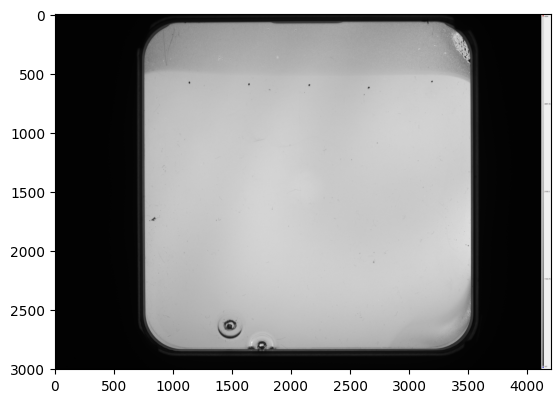

In [9]:
img = cv2.imread(img_path)
print(type(img[0][0][0]))
rgb_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_im)
print(rgb_im.shape)

In [10]:
msk = cv2.imread(msk_path)
print(np.unique(msk))
print(msk.shape)

[0 1]
(3006, 4202, 3)


(2790, 2779, 3) (2790, 2779, 3)


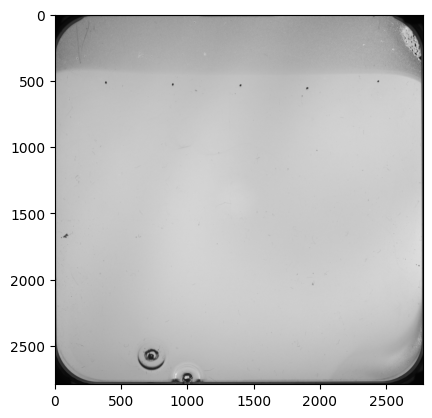

In [11]:
img, msk = crop_to_dish(rgb_im, msk)

plt.imshow(img)
print(img.shape, msk.shape)

(2816, 2816, 3) (2816, 2816, 3)


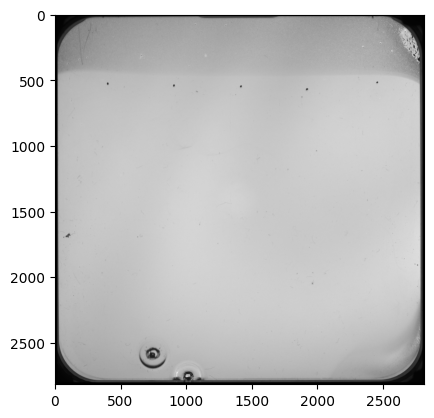

In [12]:
img, msk = pad_to_square(img, msk, patch_size)

plt.imshow(img)
print(img.shape, msk.shape)

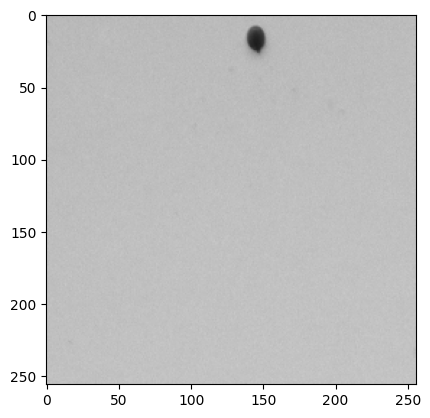

In [13]:
def _extract_patch(img, patch_size, y, x):
    w, h, c = img.shape
    size = patch_size

    patch = img[y*size:(y+1)*size, x*size:(x+1)*size]

    return patch

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = normalize_img(img)
img_patch = _extract_patch(img, patch_size, 2, 1)
plt.imshow(img_patch)

In [14]:
msk_patch = _extract_patch(msk, patch_size, 2, 1)
np.unique(msk_patch)

array([0, 1], dtype=uint8)

In [15]:
train_ds = SegmentationDataset(all_imgs, all_msks)

In [16]:
train_loader = DataLoader(
    train_ds,
    batch_size=1,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

In [17]:
img, msk = train_ds[13]
print("Batch tensor shape:", img.shape)
print("Mask shape:", msk.shape)

Batch tensor shape: torch.Size([256, 256, 3])
Mask shape: (256, 256, 3)


In [18]:
print(img_patch == img)

tensor([[[True, True, True],
         [True, True, True],
         [True, True, True],
         ...,
         [True, True, True],
         [True, True, True],
         [True, True, True]],

        [[True, True, True],
         [True, True, True],
         [True, True, True],
         ...,
         [True, True, True],
         [True, True, True],
         [True, True, True]],

        [[True, True, True],
         [True, True, True],
         [True, True, True],
         ...,
         [True, True, True],
         [True, True, True],
         [True, True, True]],

        ...,

        [[True, True, True],
         [True, True, True],
         [True, True, True],
         ...,
         [True, True, True],
         [True, True, True],
         [True, True, True]],

        [[True, True, True],
         [True, True, True],
         [True, True, True],
         ...,
         [True, True, True],
         [True, True, True],
         [True, True, True]],

        [[True, True, True],
       

In [19]:
print(msk_patch == msk)

[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]
